# Weekly activities
1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?
2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.
3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

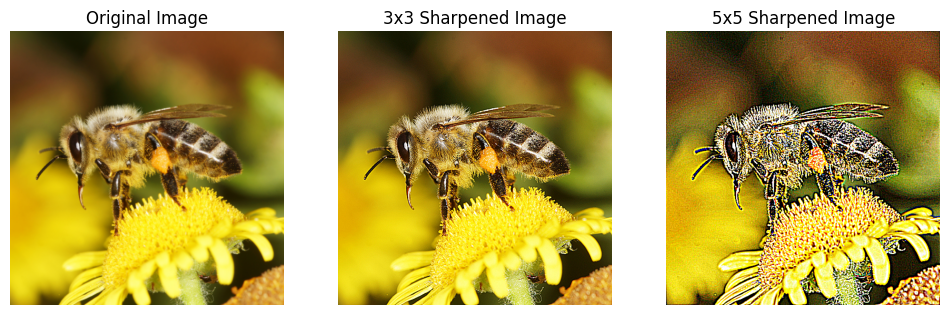

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/fuji/Documents/notes/Y3S1/miniProject/week 6/code/images/native-bee.png')

# Define sharpening kernels
sharpening_kernel_3x3 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

sharpening_kernel_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 25, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
])

# Apply the 3x3 sharpening kernel
sharpened_3x3 = cv2.filter2D(image, -1, sharpening_kernel_3x3)

# Apply the 5x5 sharpening kernel
sharpened_5x5 = cv2.filter2D(image, -1, sharpening_kernel_5x5)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('3x3 Sharpened Image')
plt.imshow(cv2.cvtColor(sharpened_3x3, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('5x5 Sharpened Image')
plt.imshow(cv2.cvtColor(sharpened_5x5, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


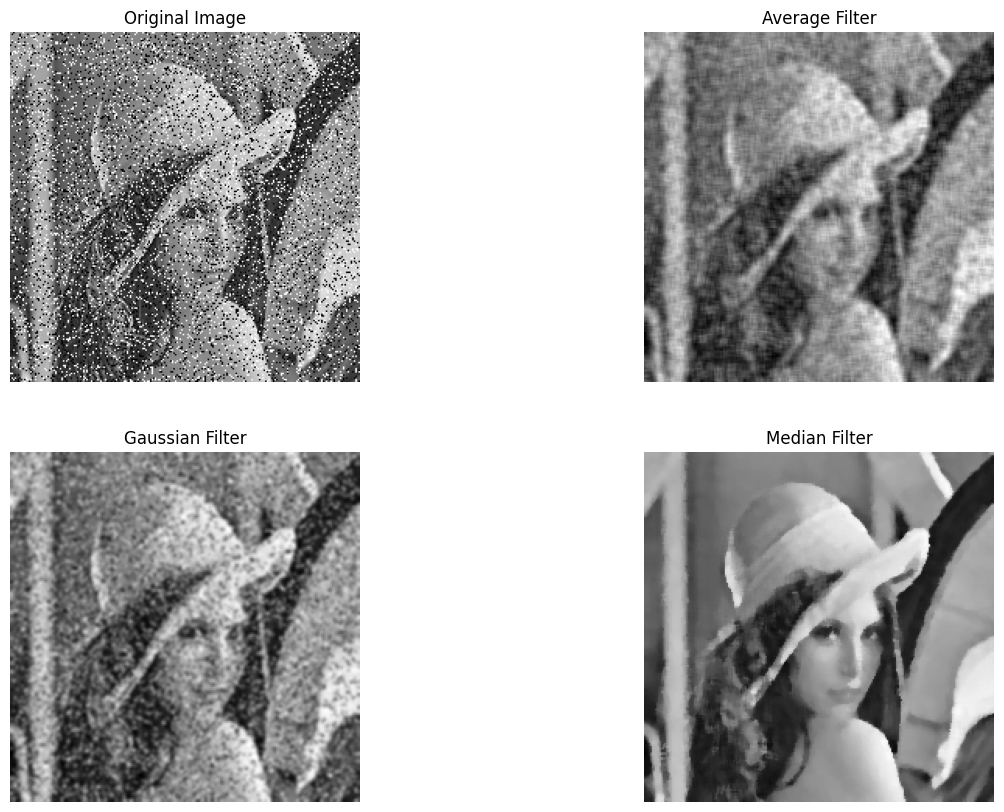

In [5]:
# Load the image
image = cv2.imread('/Users/fuji/Documents/notes/Y3S1/miniProject/week 6/code/images/noise_lena.jpg', cv2.IMREAD_GRAYSCALE)

# Define the filters
kernel_size = 5

# Average filter
average_filter = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
smoothed_avg = cv2.filter2D(image, -1, average_filter)

# Gaussian filter
smoothed_gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Median filter
smoothed_median = cv2.medianBlur(image, kernel_size)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Average Filter')
plt.imshow(smoothed_avg, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Gaussian Filter')
plt.imshow(smoothed_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Median Filter')
plt.imshow(smoothed_median, cmap='gray')
plt.axis('off')

plt.show()

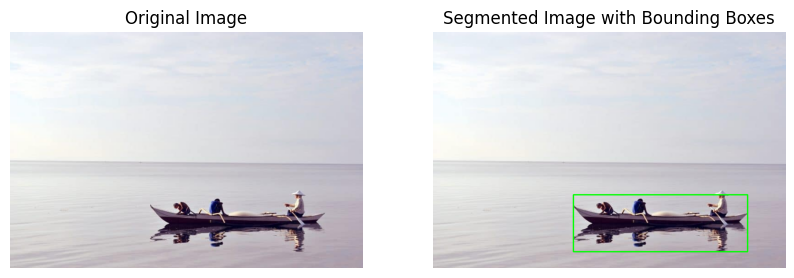

In [7]:
# Load the image
image = cv2.imread('/Users/fuji/Documents/notes/Y3S1/miniProject/week 6/code/images/boat.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding

_, binary_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# Find contours in the binary mask

contours,_= cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the detected contours
output_image = image.copy()
contour_max_area = max(contours,key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(contour_max_area)
cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image with Bounding Boxes')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()